In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
compas = pd.read_csv("compas-scores.csv")
compas.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
1,2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
3,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
4,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13


In [4]:
colremove = [ 'name', 'first', 'last', 'compas_screening_date','dob','age_cat',
             'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas','r_case_number',
     'r_days_from_arrest', 'r_offense_date',
      'r_jail_in', 'r_jail_out','vr_case_number', 
       'vr_offense_date', 'screening_date',
      'v_screening_date',]
compas2 = compas.drop(colremove, axis =1)
compas2


,id,sex,age,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_charge_degree,...,is_violent_recid,num_vr_cases,vr_charge_degree,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,type_of_assessment,decile_score.1,score_text
0,1,Male,69,Other,0,1,0,0,0,F,...,0,NaN,NaN,NaN,Risk of Violence,1,Low,Risk of Recidivism,1,Low
1,2,Male,31,Caucasian,0,5,0,0,0,O,...,0,NaN,NaN,NaN,Risk of Violence,2,Low,Risk of Recidivism,5,Medium
2,3,Male,34,African-American,0,3,0,0,0,F,...,1,NaN,(F3),Felony Battery (Dom Strang),Risk of Violence,1,Low,Risk of Recidivism,3,Low
3,4,Male,24,African-American,0,4,0,1,4,F,...,0,NaN,NaN,NaN,Risk of Violence,3,Low,Risk of Recidivism,4,Low
4,5,Male,23,African-American,0,8,1,0,1,F,...,0,NaN,NaN,NaN,Risk of Violence,6,Medium,Risk of Recidivism,8,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11752,11753,Male,47,Other,0,3,0,0,1,F,...,0,NaN,NaN,NaN,Risk of Violence,1,Low,Risk of Recidivism,3,Low
11753,11754,Male,22,Caucasian,0,7,3,5,3,M,...,0,NaN,NaN,NaN,Risk of Violence,5,Medium,Risk of Recidivism,7,Medium
11754,11755,Male,35,Other,0,4,0,0,0,M,...,0,NaN,NaN,NaN,Risk of Violence,3,Low,Risk of Recidivism,4,Low
11755,11756,Male,29,Caucasian,0,3,0,0,2,M,...,0,NaN,NaN,NaN,Risk of Violence,2,Low,Risk of Recidivism,3,Low


In [5]:
compasdrug = compas2[compas2.c_charge_degree == "F"]
compasdrug.c_charge_desc.value_counts(True).head(10)

arrest case no charge             0.222115
Possession of Cocaine             0.096596
Grand Theft in the 3rd Degree     0.094243
Driving While License Revoked     0.035289
Felony Battery (Dom Strang)       0.022696
Felony Driving While Lic Suspd    0.022004
Grand Theft (Motor Vehicle)       0.018683
Pos Cannabis W/Intent Sel/Del     0.017852
Burglary Unoccupied Dwelling      0.017160
Burglary Conveyance Unoccup       0.017022
Name: c_charge_desc, dtype: float64

In [6]:
compas2.c_charge_desc = compas2.c_charge_desc.fillna(0)
compas2.race.value_counts(True)

African-American    0.494429
Caucasian           0.347453
Hispanic            0.093561
Other               0.056222
Asian               0.004933
Native American     0.003402
Name: race, dtype: float64

In [7]:
CompWeed = compas2[compas2['c_charge_desc'].isin([ 
 'Possess Cannabis/20 Grams Or Less',
 'Possession of Cannabis',
 'Purchase Cannabis',
 'Possess Cannabis 1000FTSch',
'Pos Cannabis For Consideration',
]) ]

CompWeed = CompWeed.rename(columns ={"sex":"Sex"})
CompWeed = CompWeed.rename(columns ={"race":"Race"})
CompWeed.c_charge_desc.value_counts(True)

Possess Cannabis/20 Grams Or Less    0.516260
Possession of Cannabis               0.443089
Purchase Cannabis                    0.032520
Possess Cannabis 1000FTSch           0.004065
Pos Cannabis For Consideration       0.004065
Name: c_charge_desc, dtype: float64

In [8]:
CompWeed2 = CompWeed.groupby(["Race","Sex","score_text"]).count().reset_index()[["id","Race","score_text","Sex"]]
CompWeed2                                   

,id,Race,score_text,Sex
0,1,African-American,High,Female
1,4,African-American,Low,Female
2,2,African-American,Medium,Female
3,39,African-American,High,Male
4,41,African-American,Low,Male
5,41,African-American,Medium,Male
6,2,Caucasian,High,Female
7,5,Caucasian,Low,Female
8,5,Caucasian,Medium,Female
9,6,Caucasian,High,Male


In [9]:
CompWeed3 = CompWeed2[(CompWeed2.Race == "African-American")| (CompWeed2.Race == "Caucasian")]
CompWeed3

,id,Race,score_text,Sex
0,1,African-American,High,Female
1,4,African-American,Low,Female
2,2,African-American,Medium,Female
3,39,African-American,High,Male
4,41,African-American,Low,Male
5,41,African-American,Medium,Male
6,2,Caucasian,High,Female
7,5,Caucasian,Low,Female
8,5,Caucasian,Medium,Female
9,6,Caucasian,High,Male


In [10]:
Compdum = pd.get_dummies(CompWeed, prefix=["Race","Sex"], columns=["Race","Sex"])

In [11]:
Com2 = Compdum
Com2 = Com2.rename(columns ={"Race_African-American": "Race_African_American"})
Com2.columns

Index(['id', 'age', 'juv_fel_count', 'decile_score', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc',
       'is_recid', 'num_r_cases', 'r_charge_degree', 'r_charge_desc',
       'is_violent_recid', 'num_vr_cases', 'vr_charge_degree',
       'vr_charge_desc', 'v_type_of_assessment', 'v_decile_score',
       'v_score_text', 'type_of_assessment', 'decile_score.1', 'score_text',
       'Race_African_American', 'Race_Caucasian', 'Race_Hispanic',
       'Race_Other', 'Sex_Female', 'Sex_Male'],
      dtype='object')

In [12]:
Com2 = [Com2[Com2.Sex_Female == 1].Race_African_American.sum(),
           Com2[Com2.Sex_Male == 1].Race_African_American.sum(),
           Com2[Com2.Sex_Female == 1].Race_Caucasian.sum(),
           Com2[Com2.Sex_Male == 1].Race_Caucasian.sum(),
          ]
Com2

[7, 121, 12, 62]

In [13]:
Com3 = np.repeat(Com2, 3)
Com3

array([  7,   7,   7, 121, 121, 121,  12,  12,  12,  62,  62,  62])

In [14]:
rt = list(Com3)

In [15]:
CompWeed3['totals'] = rt
CompWeed3 = CompWeed3.rename(columns = {"score_text":"Decile Score Category"})

CompWeed3["% of Gender/Race Category"] = round(CompWeed3["id"]/CompWeed3["totals"]*100, 1)
COMPAS2 = CompWeed3
COMPAS2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,Race,Decile Score Category,Sex,totals,% of Gender/Race Category
0,1,African-American,High,Female,7,14.3
1,4,African-American,Low,Female,7,57.1
2,2,African-American,Medium,Female,7,28.6
3,39,African-American,High,Male,121,32.2
4,41,African-American,Low,Male,121,33.9
5,41,African-American,Medium,Male,121,33.9
6,2,Caucasian,High,Female,12,16.7
7,5,Caucasian,Low,Female,12,41.7
8,5,Caucasian,Medium,Female,12,41.7
9,6,Caucasian,High,Male,62,9.7


In [16]:
COMPASPIVOT = COMPAS2.pivot_table(
    values = "% of Gender/Race Category",
    index = 'Race', 
    columns = 'Decile Score Category'
)
COMPASPIVOT =COMPASPIVOT.reindex(["Low","Medium","High"])

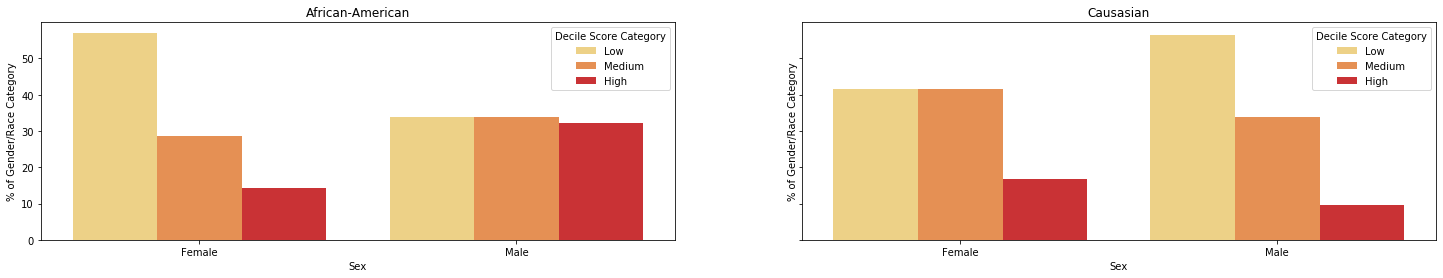

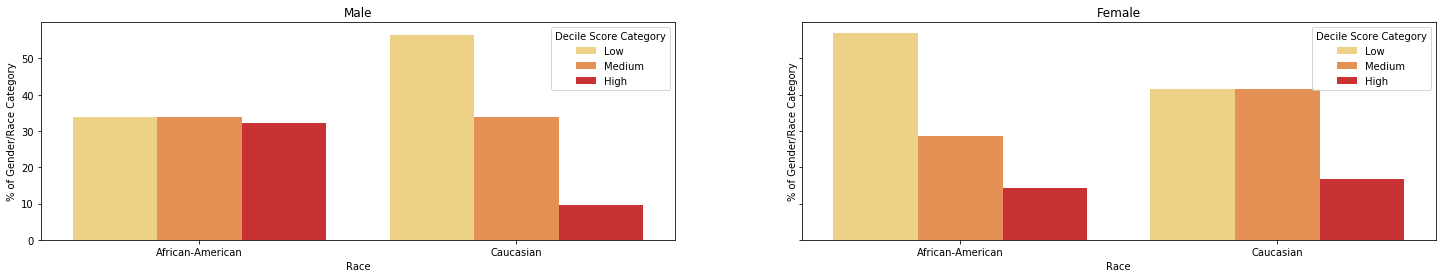

In [17]:
r1 = COMPAS2[(COMPAS2.Race == "African-American")]
r3 = COMPAS2[(COMPAS2.Race == "Caucasian")]

m1 = COMPAS2[(COMPAS2.Sex == "Male")]
m2 = COMPAS2[(COMPAS2.Sex == "Female")]

f, axes = plt.subplots(1, 2, sharey=True, figsize=(25, 4))
rac1 = (sns.barplot(x= "Sex" , y="% of Gender/Race Category", data=r1, hue = "Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd", ax=axes[0])).set_title("African-American")
rac3 = (sns.barplot(x= "Sex" , y="% of Gender/Race Category", data=r3, hue = "Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd", ax=axes[1])).set_title("Causasian")

f, axes = plt.subplots(1, 2, sharey=True, figsize=(25, 4))
Sex1 = (sns.barplot(x= "Race" , y="% of Gender/Race Category", data=m1, hue = "Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd", ax=axes[0])).set_title("Male")
Sex2 = (sns.barplot(x= "Race" , y="% of Gender/Race Category", data=m2, hue = "Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd", ax=axes[1])).set_title("Female")


Text(0.5, 1.0, 'Distribution of Decile Score for Cannabis Possession Offenses: Male Convicts')

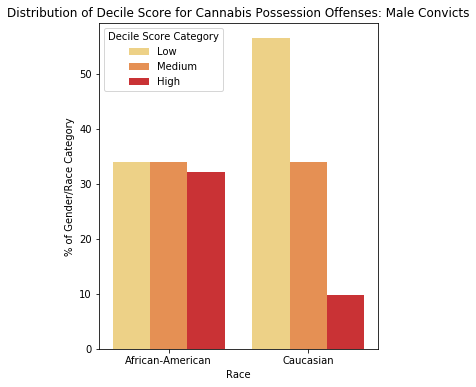

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 6
sns.barplot(x= "Race" , y="% of Gender/Race Category", data=m1, hue = "Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd").set_title("Distribution of Decile Score for Cannabis Possession Offenses: Male Convicts")

In [19]:
MaleCannabis = m1.pivot_table(
    values = "% of Gender/Race Category",
    index =  'Decile Score Category',
    columns = 'Race',
)

MaleCannabis.reindex(["Low","Medium","High"])

Race,African-American,Caucasian
Decile Score Category,,
Low,33.9,56.5
Medium,33.9,33.9
High,32.2,9.7


In [20]:
VCompWeed2 = CompWeed.groupby(["Race","Sex","v_score_text"]).count().reset_index()[["id","Race","v_score_text","Sex"]]
VCompWeed2                                   

,id,Race,v_score_text,Sex
0,1,African-American,High,Female
1,5,African-American,Low,Female
2,1,African-American,Medium,Female
3,19,African-American,High,Male
4,62,African-American,Low,Male
5,40,African-American,Medium,Male
6,7,Caucasian,Low,Female
7,5,Caucasian,Medium,Female
8,2,Caucasian,High,Male
9,37,Caucasian,Low,Male


In [21]:
VCompWeed3 = VCompWeed2[(VCompWeed2.Race == "African-American")| (VCompWeed2.Race == "Caucasian")]
VCompWeed3

,id,Race,v_score_text,Sex
0,1,African-American,High,Female
1,5,African-American,Low,Female
2,1,African-American,Medium,Female
3,19,African-American,High,Male
4,62,African-American,Low,Male
5,40,African-American,Medium,Male
6,7,Caucasian,Low,Female
7,5,Caucasian,Medium,Female
8,2,Caucasian,High,Male
9,37,Caucasian,Low,Male


In [22]:
VCompdum = pd.get_dummies(CompWeed, prefix=["Race","Sex"], columns=["Race","Sex"])

In [23]:
VCom2 = VCompdum
VCom2 = VCom2.rename(columns ={"Race_African-American": "Race_African_American"})
VCom2.columns

Index(['id', 'age', 'juv_fel_count', 'decile_score', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc',
       'is_recid', 'num_r_cases', 'r_charge_degree', 'r_charge_desc',
       'is_violent_recid', 'num_vr_cases', 'vr_charge_degree',
       'vr_charge_desc', 'v_type_of_assessment', 'v_decile_score',
       'v_score_text', 'type_of_assessment', 'decile_score.1', 'score_text',
       'Race_African_American', 'Race_Caucasian', 'Race_Hispanic',
       'Race_Other', 'Sex_Female', 'Sex_Male'],
      dtype='object')

In [24]:
VCom2 = [VCom2[VCom2.Sex_Female == 1].Race_African_American.sum(),
           VCom2[VCom2.Sex_Male == 1].Race_African_American.sum(),
           VCom2[VCom2.Sex_Female == 1].Race_Caucasian.sum(),
           VCom2[VCom2.Sex_Male == 1].Race_Caucasian.sum(),
          ]
VCom2

[7, 121, 12, 62]

In [25]:
VCom3 = np.repeat(VCom2, 3)
rt = list(VCom3)
rt.pop(8)

12

In [26]:
VCompWeed3['totals'] = rt
VCompWeed3 = VCompWeed3.rename(columns = {"v_score_text":"Violent Decile Score Category"})

VCompWeed3["% of Gender/Race Category"] = round(VCompWeed3["id"]/VCompWeed3["totals"]*100, 1)
VCOMPAS2 = VCompWeed3
VCOMPAS2 =  VCOMPAS2.set_index("Violent Decile Score Category").drop("Medium", axis = 0).reset_index()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
VCOMPASPIVOT = VCOMPAS2.pivot_table(
    values = "% of Gender/Race Category",
    index = 'Race', 
    columns = 'Violent Decile Score Category'
)
VCOMPASPIVOT

Violent Decile Score Category,High,Low
Race,,
African-American,15.0,61.3
Caucasian,3.2,59.0


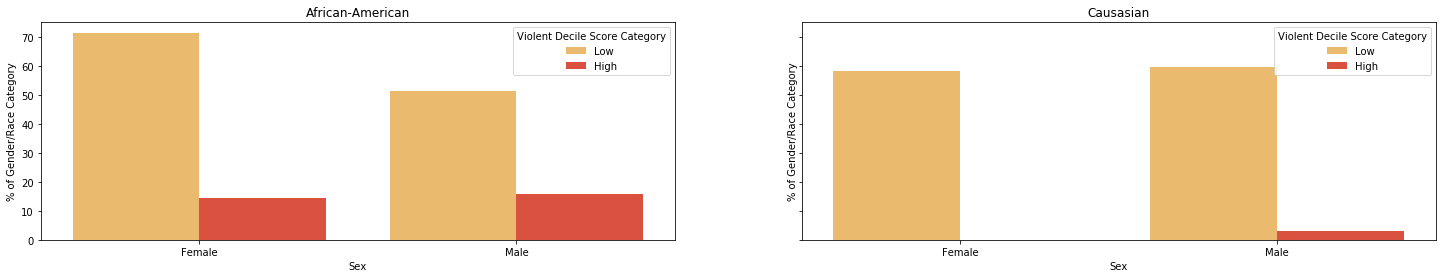

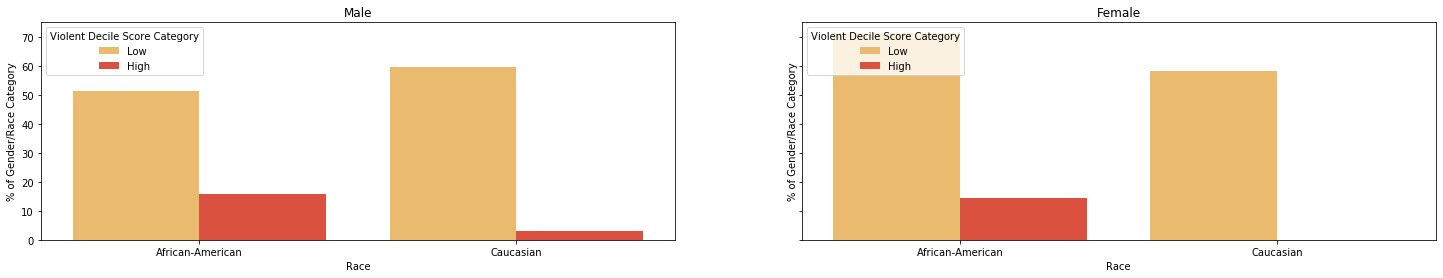

In [28]:
r1 = VCOMPAS2[(VCOMPAS2.Race == "African-American")]
r3 = VCOMPAS2[(VCOMPAS2.Race == "Caucasian")]

m1 = VCOMPAS2[(VCOMPAS2.Sex == "Male")]
m2 = VCOMPAS2[(VCOMPAS2.Sex == "Female")]

f, axes = plt.subplots(1, 2, sharey=True, figsize=(25, 4))
rac1 = (sns.barplot(x= "Sex" , y="% of Gender/Race Category", data=r1, hue = "Violent Decile Score Category", hue_order = ["Low", "High",],palette="YlOrRd", ax=axes[0])).set_title("African-American")
rac3 = (sns.barplot(x= "Sex" , y="% of Gender/Race Category", data=r3, hue = "Violent Decile Score Category", hue_order = ["Low", "High",],palette="YlOrRd", ax=axes[1])).set_title("Causasian")

f, axes = plt.subplots(1, 2, sharey=True, figsize=(25, 4))
Sex1 = (sns.barplot(x= "Race" , y="% of Gender/Race Category", data=m1, hue = "Violent Decile Score Category", hue_order = ["Low", "High",],palette="YlOrRd", ax=axes[0])).set_title("Male")
Sex2 = (sns.barplot(x= "Race" , y="% of Gender/Race Category", data=m2, hue = "Violent Decile Score Category", hue_order = ["Low", "High",],palette="YlOrRd", ax=axes[1])).set_title("Female")


Text(0.5, 1.0, 'Distribution of Violent Decile Score for Cannabis-Related Offenses: Male Convicts')

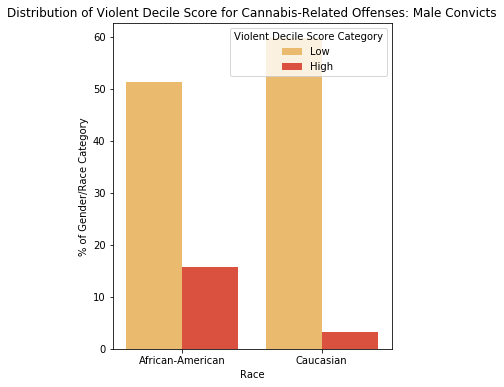

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 6
sns.barplot(x= "Race" , y="% of Gender/Race Category", data=m1, hue = "Violent Decile Score Category", hue_order = ["Low", "High",],palette="YlOrRd").set_title("Distribution of Violent Decile Score for Cannabis-Related Offenses: Male Convicts")

In [37]:
compasblackpredict = CompWeed[(CompWeed.Race == "African-American")&(CompWeed.Sex == "Male")]

compasblackpredict = compasblackpredict[["is_recid", "decile_score"]]

compasblackpredict = compasblackpredict[(compasblackpredict.is_recid != -1)& (compasblackpredict.decile_score != -1)]
compasblackpredict

Bllikely = (compasblackpredict[compasblackpredict.decile_score > 5]).decile_score.count()
Bllikely

recid = compasblackpredict.is_recid.sum()
recid

Bllikely/recid

compaswhitepredict = CompWeed[(CompWeed.Race == "Caucasian") &(CompWeed.Sex == "Male")]

compaswhitepredict = compaswhitepredict[["is_recid","decile_score"]]

compaswhitepredict = compaswhitepredict[(compaswhitepredict.is_recid != -1)]
compaswhitepredict.head()

Whlikely = (compaswhitepredict[compaswhitepredict.decile_score > 5]).decile_score.count()
Whlikely

Whrecid = compaswhitepredict.is_recid.sum()
Whrecid

Whlikely/Whrecid

#Creaing dataframe to easily graph
Baggresults = pd.DataFrame({"Race": ["Black Men", "White Men", "Black Men", "White Men", "Black Men", "White Men"],
                   'Data': [recid, Whrecid, Bllikely, round(Whlikely,0), round(((Bllikely/recid)-1)*100,2),round(((Whlikely/Whrecid)-1)*100,2)],
                   "Metric": ["# of Recidivisms","# of Recidivisms","# With Score > 5","# With Score > 5", "% Error", "% Error"] })



In [38]:
Baggresults =Baggresults.groupby(["Race", "Metric"]).mean()
Baggresults = Baggresults.reset_index()
Baggresults

,Race,Metric,Data
0,Black Men,# With Score > 5,72.00
1,Black Men,# of Recidivisms,51.00
2,Black Men,% Error,41.18
3,White Men,# With Score > 5,17.00
4,White Men,# of Recidivisms,20.00
5,White Men,% Error,-15.00


In [39]:
list([Baggresults.Data.iloc[2], Baggresults.Data.iloc[5]])

[41.18, -15.0]